In [14]:
from bs4 import BeautifulSoup
import urllib.request

f = open('./movie_reviews.txt', 'w', encoding='UTF-8')

for no in range(1, 501):
    url = 'https://movie.naver.com/movie/point/af/list.naver?&page=%d' % no
    html = urllib.request.urlopen(url)
    soup = BeautifulSoup(html, 'html.parser')

    reviews = soup.select('tbody > tr > td.title')
    for rev in reviews: 
        rev_lst = []
        title = rev.select_one('a.movie').text.strip()
        score = rev.select_one('div.list_netizen_score > em').text.strip()
        comment = rev.select_one('br').next_sibling.strip()
        
        if int(score) >= 8 :
            label = 1   
        elif int(score) <= 4 :
            label = 0   
        else :
            label = 2   
        
        f.write(f'{title}\t{score}\t{comment}\t{label}\n')
f.close()

In [16]:
import pandas as pd
data = pd.read_csv('./movie_reviews.txt', delimiter = '\t', names=['title', 'score', 'comment', 'label'])
df_data = pd.DataFrame(data)
df_data.head(10)

,title,score,comment,label
0,불릿 트레인,8,왜색 포기하고 개연성 포기하고 보면 됨. 그럼 볼 이유가 없는건가...재미는 있었음,1
1,헌트,10,처음부터 관객의 멱살을 잡아 끄는 영화.80년대 초 근대화의 남북의 대치되는 이념과...,1
2,카터,1,아니 이유없이 보지 왜 보여주는뎈ㅋㅋㅋ 심지어 카메라 앵글 의도를 모르겠음ㅋㅋㅋ 잔...,0
3,육사오(6/45),1,이런 영화는 개봉하면 나라에서 벌금 걷어야 되는거 아닌가 싶음 염력도 재밌게 본 ...,0
4,헌트,9,진짜 우리나라 영화는 대사가 들리게 사운드 신경 좀써라 나머진 깔거 없어요,1
5,엔젤 하트,9,샤머니즘 소재가 특히 흥미로웠습니다. 산제물의 피를 얼굴에 붓는 장면이랑 의뢰인이 ...,1
6,DC 리그 오브 슈퍼-펫,9,재미있음 dc히어로 좋아하면 괜찮을건데 더빙판 어쩔...,1
7,카터,2,너무 재미없다 매우 잔인하다,0
8,놉,7,필 감독님의 작품이라는것을 감안하면 좀 아쉬움이 남는다.겟아웃에서 보여주었던 참신한...,2
9,육사오(6/45),10,부담없이 여자친구랑 너무 재밌게 봤네요^^,1


In [17]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    5000 non-null   object
 1   score    5000 non-null   int64 
 2   comment  4757 non-null   object
 3   label    5000 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 156.4+ KB


###### 칼럼을 확인해보면 영화 제목(title), 평점(score), 리뷰(comment), 레이블(label)로 분류됨을 볼 수 있습니다. 리뷰를 보면 코멘트 없이 평점만 작성된 것도 있고 중복되는 부분도 있기 때문에 이러한 부분을 전처리 합니다.

https://prlabhotelshoe.tistory.com/20?category=1003351

In [18]:
df_reviews = df_data.dropna()

df_reviews = df_reviews.drop_duplicates(['comment'])

df_reviews.info()
df_reviews.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4707 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    4707 non-null   object
 1   score    4707 non-null   int64 
 2   comment  4707 non-null   object
 3   label    4707 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 183.9+ KB


,title,score,comment,label
0,불릿 트레인,8,왜색 포기하고 개연성 포기하고 보면 됨. 그럼 볼 이유가 없는건가...재미는 있었음,1
1,헌트,10,처음부터 관객의 멱살을 잡아 끄는 영화.80년대 초 근대화의 남북의 대치되는 이념과...,1
2,카터,1,아니 이유없이 보지 왜 보여주는뎈ㅋㅋㅋ 심지어 카메라 앵글 의도를 모르겠음ㅋㅋㅋ 잔...,0
3,육사오(6/45),1,이런 영화는 개봉하면 나라에서 벌금 걷어야 되는거 아닌가 싶음 염력도 재밌게 본 ...,0
4,헌트,9,진짜 우리나라 영화는 대사가 들리게 사운드 신경 좀써라 나머진 깔거 없어요,1
5,엔젤 하트,9,샤머니즘 소재가 특히 흥미로웠습니다. 산제물의 피를 얼굴에 붓는 장면이랑 의뢰인이 ...,1
6,DC 리그 오브 슈퍼-펫,9,재미있음 dc히어로 좋아하면 괜찮을건데 더빙판 어쩔...,1
7,카터,2,너무 재미없다 매우 잔인하다,0
8,놉,7,필 감독님의 작품이라는것을 감안하면 좀 아쉬움이 남는다.겟아웃에서 보여주었던 참신한...,2
9,육사오(6/45),10,부담없이 여자친구랑 너무 재밌게 봤네요^^,1


In [19]:
movie_lst = df_reviews.title.unique()
print('전체 영화 편수 =', len(movie_lst))
print(movie_lst[:10])

전체 영화 편수 = 737
['불릿 트레인' '헌트' '카터' '육사오(6/45)' '엔젤 하트' 'DC 리그 오브 슈퍼-펫' '놉' '외계+인 1부'
 '한산: 용의 출현' '비상선언']


In [20]:
cnt_movie = df_reviews.title.value_counts() 
cnt_movie[:20]

헌트                 613
외계+인 1부            589
육사오(6/45)          509
놉                  370
불릿 트레인             310
한산: 용의 출현          295
탑건: 매버릭            263
카터                 128
비상선언               116
헤어질 결심             111
모어                  57
프레이                 33
풀타임                 30
어웨이크                27
미니언즈2               27
DC 리그 오브 슈퍼-펫       21
범죄도시2               18
썸머 필름을 타고!          17
더 킬러: 죽어도 되는 아이     16
엘비스                 15
Name: title, dtype: int64

In [21]:
info_movie = df_reviews.groupby('title')['score'].describe()
info_movie.sort_values(by=['count'], axis=0, ascending=False)

,count,mean,std,min,25%,50%,75%,max
title,,,,,,,,
헌트,613.0,8.114192,2.719455,1.0,7.0,10.0,10.0,10.0
외계+인 1부,589.0,6.640068,3.577066,1.0,2.0,8.0,10.0,10.0
육사오(6/45),509.0,8.420432,2.745801,1.0,8.0,10.0,10.0,10.0
놉,370.0,7.143243,2.829102,1.0,6.0,8.0,10.0,10.0
불릿 트레인,310.0,6.554839,2.636910,1.0,5.0,7.0,8.0,10.0
...,...,...,...,...,...,...,...,...
반지의 제왕: 반지 원정대,1.0,10.000000,NaN,10.0,10.0,10.0,10.0,10.0
반지의 제왕: 왕의 귀환,1.0,10.000000,NaN,10.0,10.0,10.0,10.0,10.0
밤은 짧아 걸어 아가씨야,1.0,10.000000,NaN,10.0,10.0,10.0,10.0,10.0


In [22]:
df_reviews.label.value_counts()

1    3086
0     888
2     733
Name: label, dtype: int64

In [26]:
pos_reviews = df_reviews[df_reviews['label'] == 1]
neg_reviews = df_reviews[df_reviews['label'] == 0]

In [28]:
import re
pos_reviews['comment'] = pos_reviews['comment'].apply(lambda x: re.sub(r'[^ㄱ-ㅣ가-힝+]', ' ', x))
neg_reviews['comment'] = neg_reviews['comment'].apply(lambda x: re.sub(r'[^ㄱ-ㅣ가-힝+]', ' ', x))

C:\Users\ssong\AppData\Local\Temp\ipykernel_2840\3303113497.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos_reviews['comment'] = pos_reviews['comment'].apply(lambda x: re.sub(r'[^ㄱ-ㅣ가-힝+]', ' ', x))
C:\Users\ssong\AppData\Local\Temp\ipykernel_2840\3303113497.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg_reviews['comment'] = neg_reviews['comment'].apply(lambda x: re.sub(r'[^ㄱ-ㅣ가-힝+]', ' ', x))


In [32]:
from konlpy.tag import Okt
okt = Okt()
pos_comment_nouns = []
for cmt in pos_reviews['comment']:
    pos_comment_nouns.extend(okt.nouns(cmt)) 

In [34]:
pos_comment_nouns2 = []
word = [w for w in pos_comment_nouns if len(w) > 1]  
pos_comment_nouns2.extend(word)

In [36]:
pos_comment_nouns2

['왜색',
 '포기',
 '개연',
 '포기',
 '이유',
 '건가',
 '재미',
 '처음',
 '관객',
 '멱살',
 '영화',
 '년대',
 '근대화',
 '남북',
 '대치',
 '이념',
 '사상',
 '스파이',
 '시나리오',
 '이정재',
 '욕심',
 '정우성',
 '연기',
 '한몫',
 '반전',
 '반전',
 '반전',
 '반전',
 '만점',
 '감독',
 '데뷔',
 '진짜',
 '우리나라',
 '영화',
 '대사',
 '사운드',
 '신경',
 '나머진',
 '샤머니즘',
 '소재',
 '물의',
 '얼굴',
 '장면',
 '의뢰인',
 '악마',
 '모습',
 '마지막',
 '장면',
 '영화',
 '곡성',
 '히어로',
 '더빙',
 '부담',
 '여자친구',
 '생각',
 '영화',
 '다큐',
 '점수',
 '별로',
 '전형',
 '지도',
 '이정재',
 '감성',
 '액션',
 '작품',
 '역사',
 '사실',
 '영화',
 '스토리',
 '결합',
 '감독',
 '웃음',
 '포인트',
 '배우',
 '연기력',
 '영화',
 '살림',
 '그냥',
 '영화관',
 '무재',
 '밋게봣',
 '우리나라',
 '가안',
 '재밋기도',
 '우리나라',
 '영화',
 '기법',
 '발전',
 '구나',
 '생각',
 '거울',
 '에손',
 '장면',
 '정말',
 '생각',
 '지도',
 '장면',
 '최고',
 '기억',
 '남구',
 '부도',
 '얼른',
 '왓으',
 '화이팅',
 '사운드',
 '믹싱',
 '올해',
 '한국영',
 '하나',
 '이건',
 '자막',
 '애니',
 '더빙',
 '진짜',
 '빵빵',
 '스토리',
 '박하',
 '대사',
 '드립',
 '극장',
 '와우',
 '진짜',
 '미니',
 '정우성',
 '이정재',
 '비롯',
 '다른',
 '배우',
 '인분',
 '이상',
 '활약',
 '이정재',
 '감독',
 '최고',
 '깔깔이',
 '영화',
 '일본',
 '떡칠

In [44]:
from collections import Counter
pos_word_count = Counter(pos_comment_nouns2)

pos_word_count

Counter({'왜색': 5,
         '포기': 4,
         '개연': 10,
         '이유': 26,
         '건가': 6,
         '재미': 84,
         '처음': 75,
         '관객': 33,
         '멱살': 2,
         '영화': 1446,
         '년대': 10,
         '근대화': 1,
         '남북': 3,
         '대치': 1,
         '이념': 1,
         '사상': 1,
         '스파이': 3,
         '시나리오': 7,
         '이정재': 121,
         '욕심': 3,
         '정우성': 55,
         '연기': 277,
         '한몫': 1,
         '반전': 40,
         '만점': 11,
         '감독': 184,
         '데뷔': 13,
         '진짜': 289,
         '우리나라': 38,
         '대사': 57,
         '사운드': 13,
         '신경': 4,
         '나머진': 1,
         '샤머니즘': 1,
         '소재': 29,
         '물의': 3,
         '얼굴': 15,
         '장면': 75,
         '의뢰인': 1,
         '악마': 5,
         '모습': 41,
         '마지막': 61,
         '곡성': 3,
         '히어로': 7,
         '더빙': 4,
         '부담': 5,
         '여자친구': 4,
         '생각': 265,
         '다큐': 5,
         '점수': 11,
         '별로': 20,
         '전형': 4,
         '지도':

In [45]:
max = 20
pos_top_20 = {}
for word, counts in pos_word_count.most_common(max):
    pos_top_20[word] = counts
    print(f'{word} : {counts}')

영화 : 1446
진짜 : 289
연기 : 277
배우 : 276
생각 : 265
스토리 : 234
최고 : 226
감독 : 184
사람 : 158
정말 : 151
평점 : 151
보고 : 147
연출 : 140
기대 : 139
감동 : 124
이정재 : 121
액션 : 115
시간 : 113
그냥 : 106
작품 : 99


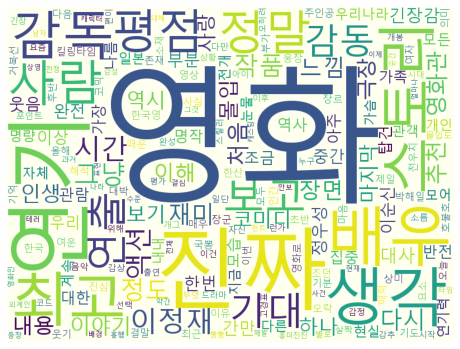

In [43]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(font_path='malgun', background_color='ivory', width=800, height=600)
cloud = wc.generate_from_frequencies(pos_word_count)
plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

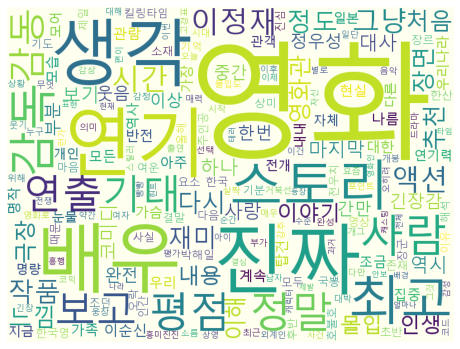

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(font_path='malgun', background_color='ivory', width=800, height=600)
cloud = wc.generate_from_frequencies(pos_word_count)
plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

영화 : 404
스토리 : 107
진짜 : 88
감독 : 80
배우 : 79
시간 : 68
평점 : 60
액션 : 51
생각 : 47
연기 : 46
그냥 : 45
정도 : 42
보고 : 37
하나 : 37
재미 : 37
연출 : 36
사람 : 35
내용 : 35
최악 : 35
수준 : 34


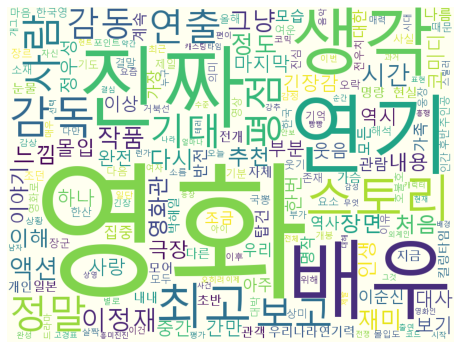

In [49]:
neg_comment_nouns = []
for cmt in neg_reviews['comment']:
    neg_comment_nouns.extend(okt.nouns(cmt)) 

neg_comment_nouns2 = []
word = [w for w in neg_comment_nouns if len(w) > 1]  
neg_comment_nouns2.extend(word)  
    
neg_word_count = Counter(neg_comment_nouns2)

neg_top_20 = {}
for word, counts in neg_word_count.most_common(max):
    neg_top_20[word] = counts
    print(f'{word} : {counts}')

wc = WordCloud(font_path='malgun', background_color='ivory', width=800, height=600)
cloud = wc.generate_from_frequencies(pos_word_count)
plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()